In [57]:
# import necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
from matplotlib.pyplot import imshow
import seaborn as sns # visualization

from PIL import Image, ImageOps
import cv2

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import InterclusterDistance
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import cluster

from keras.layers import Dense, Flatten
from keras import Model

from sklearn.manifold import TSNE

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import os

# deep learning

# importing the librairies

from glob import glob
import sklearn.metrics as metrics
import tensorflow as tf

# importing the librairies
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from tensorflow.keras.applications import VGG16

# suppress deprecation warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [58]:
directory = "F:\Ingenieur_IA\P6\cv_nlp\yelp_photos"
df = pd.read_json(directory + "\photos.json", lines=True)

In [59]:
print(f"The dimensions of photos.json are {df.shape[0]} lines and {df.shape[1]} rows.")
df.head(5)

The dimensions of photos.json are 200100 lines and 4 rows.


photo_id             business_id  \
0  zsvj7vloL4L5jhYyPIuVwg  Nk-SJhPlDBkAZvfsADtccA   
1  HCUdRJHHm_e0OCTlZetGLg  yVZtL5MmrpiivyCIrVkGgA   
2  vkr8T0scuJmGVvN2HJelEA  _ab50qdWOk0DdB6XOrBitw   
3  pve7D6NUrafHW3EAORubyw  SZU9c8V2GuREDN5KgyHFJw   
4  H52Er-uBg6rNrHcReWTD2w  Gzur0f0XMkrVxIwYJvOt2g   

                                             caption    label  
0  Nice rock artwork everywhere and craploads of ...   inside  
1                                                     outside  
2                                     oyster shooter    drink  
3                                      Shrimp scampi     food  
4                                                        food

In [60]:
labels = df.label.unique().tolist()
labels

['inside', 'outside', 'drink', 'food', 'menu']

In [61]:
# lets save 200 images from each label

sample_df = pd.DataFrame()

for label in labels:
    label_df = df[df["label"] == label].sample(200, random_state=42)
    sample_df = sample_df.append(label_df, ignore_index=True)

In [62]:
sample_df

photo_id             business_id  \
0    cO58-hmFkBxDUQ4B0p40AA  v8IBu8Td9IuIvbcmHv9ZRA   
1    7_hiXIbS5Ub0_eiRxr5COg  7rMxt2f3uvC6xPQtHgQKLQ   
2    XseBUNM81RxxtfDgyjxXiA  Uw46n__imJ52D7Zh1vJVrQ   
3    _IRUZoGYSr9bICvBJrPnhw  3oFE-751lsSdkggDd7L-aw   
4    x8xVVzTI3yW5xZraRZNxfQ  NetawOi6wDa1mGJumW4-zQ   
..                      ...                     ...   
995  FYcHZXujQX0GGs1oevYfdQ  jyRQNFeaGhdZBgf4kkWFlA   
996  PP2dCAxKLHMzqNAQfoeerw  AvMhoV5RbPzm1TFuW8WEDQ   
997  WiRnjbxlRNGBrCzYDhybWA  3VZsvccKrkvmBshoAFrgGw   
998  Wc-r1NIkj8VvpajjOFa1YA  g2hkkxwC2llfR-eYr0HPvQ   
999  M0qxoYvHWadKR04Bq8BOGQ  tYn8hGpZiRgJ8cP2FcI_YQ   

                                               caption   label  
0    You can bring in a framed pic of your pup to p...  inside  
1                                                       inside  
2    The Cowgirl's bathroom looks like a barn with ...  inside  
3                                               We ID.  inside  
4                                                       inside  
..                                                 ...     ...  
995                                                       menu  
996                                      Yummy Noodles    menu  
997                                               Menu    menu  
998                                                       menu  
999                                                       menu  

[1000 rows x 4 columns]

### Example of image preprocessing

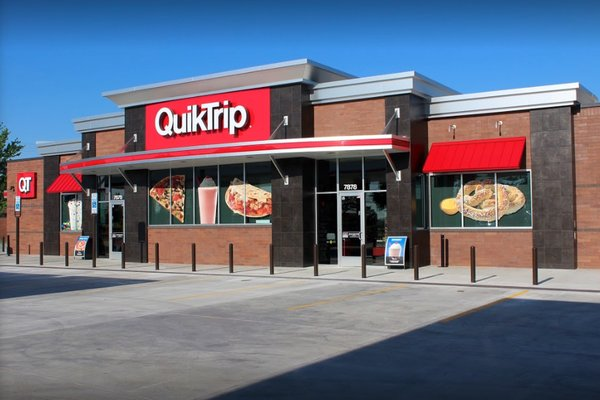

In [63]:
img = Image.open(directory + "\\photos\\" + sample_df.photo_id.iloc[350] + ".jpg")
img

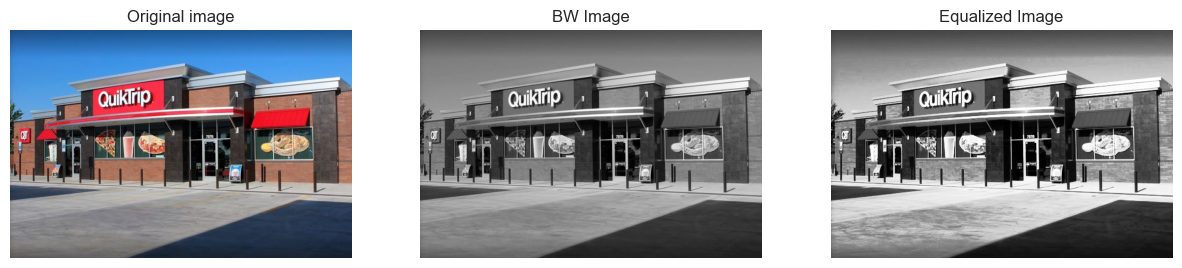

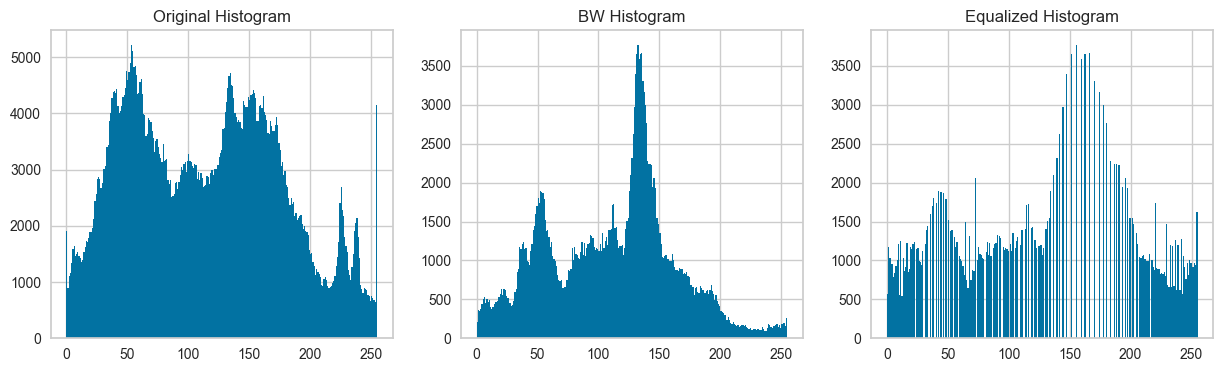

In [64]:
plt.figure(figsize=(15,4))

image_color = img
image_bw = ImageOps.grayscale(image_color)
image_eq = ImageOps.equalize(image_bw)

images = [image_color, image_bw, image_eq]
titles = ['Original image', 'BW Image', 'Equalized Image']

images_np = [np.array(i) for i in images]
titles_hists = ['Original Histogram', 'BW Histogram', 'Equalized Histogram']

# plot images

for i in range(len(images)):
    plt.subplot(1,len(images),i+1)
    plt.imshow(images[i],'gray')
    plt.axis("off")
    plt.title(titles[i])
plt.show()

plt.figure(figsize=(15,4))
# plot histograms

for i in range(len(images_np)):
    plt.subplot(1,len(images),i+1)
    plt.hist(images_np[i].flatten(), bins=range(256))
    plt.title(titles_hists[i])
plt.show()

Oriented FAST and Rotated BRIEF, or ORB for short, is an open source alternative to similar algorithms such as SIFT and SURF, which are patented. It uses FAST to detect the image keypoints and then computes the BRIEF descriptors. (More information here: https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html)  

In [65]:
orb = cv2.ORB_create(nfeatures=100)
keypoints = orb.detect(image_blur, None)
keypoints, descriptors = orb.compute(image_blur , keypoints)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'detect'
> Overload resolution failed:
>  - image is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'image'
>  - Can't parse 'images'. Input argument doesn't provide sequence protocol
>  - Can't parse 'images'. Input argument doesn't provide sequence protocol


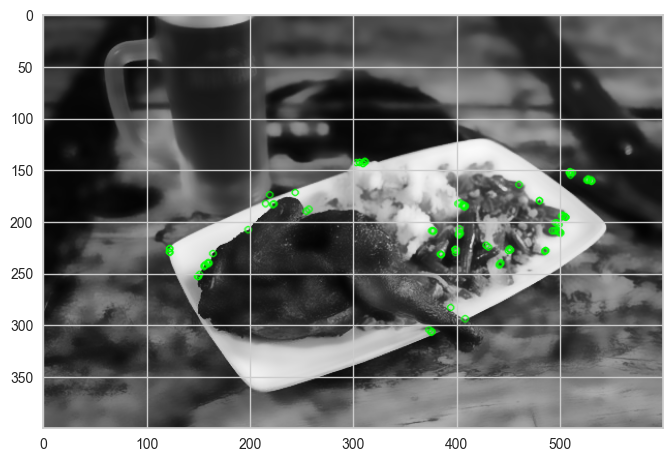

(<matplotlib.image.AxesImage at 0x1dcfecf50c0>, None)

In [ ]:
image2 = cv2.drawKeypoints(image_blur, keypoints, None, color=(0,255,0), flags=0)
plt.imshow(image2), plt.show()

In [ ]:
descriptors

array([[114, 235, 240, ...,  30, 206, 207],
       [109, 114, 252, ..., 143,  71, 241],
       [ 92, 168, 196, ..., 240, 138,  12],
       ...,
       [117,  68,  75, ..., 243,  96,  32],
       [ 93,  28, 127, ..., 225,  71,  35],
       [ 33,  79,  90, ..., 170,  74, 136]], dtype=uint8)

### Create an array of images in numpy array format

In [ ]:
sample_images = []

for i in range(0,sample_df.shape[0]):
    img = Image.open(directory + "\\photos\\" + sample_df.photo_id.iloc[i] + ".jpg")
    img = ImageOps.grayscale(img)
    img = ImageOps.equalize(img)
    img = np.array(img)
    # img = cv2.GaussianBlur(img,(3,3),0)
    cv2.bilateralFilter(np.array(img), 15, 50, 50)
    # img = cv2.resize(img, (224,224))
    sample_images.append(img)

In [ ]:
sample_df["np_image"] = sample_images
sample_df.head()

photo_id             business_id  \
0  cO58-hmFkBxDUQ4B0p40AA  v8IBu8Td9IuIvbcmHv9ZRA   
1  7_hiXIbS5Ub0_eiRxr5COg  7rMxt2f3uvC6xPQtHgQKLQ   
2  XseBUNM81RxxtfDgyjxXiA  Uw46n__imJ52D7Zh1vJVrQ   
3  _IRUZoGYSr9bICvBJrPnhw  3oFE-751lsSdkggDd7L-aw   
4  x8xVVzTI3yW5xZraRZNxfQ  NetawOi6wDa1mGJumW4-zQ   

                                             caption   label  \
0  You can bring in a framed pic of your pup to p...  inside   
1                                                     inside   
2  The Cowgirl's bathroom looks like a barn with ...  inside   
3                                             We ID.  inside   
4                                                     inside   

                                            np_image  
0  [[114, 114, 112, 111, 108, 106, 104, 103, 101,...  
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2  [[209, 253, 247, 100, 89, 209, 231, 248, 160, ...  
3  [[146, 151, 157, 161, 159, 151, 137, 125, 104,...  
4  [[164, 164, 158, 147, 140, 131, 114, 88, 86, 7...

### Get descriptors for each image in sample_images

In [ ]:
descriptors = []
keypoints = []

orb = cv2.ORB_create(nfeatures=500)

for img in sample_images:
    kp = orb.detect(img,None)
    kp, des = orb.compute(img, kp)
    descriptors.append(des)
    keypoints.append(kp)

In [ ]:
desc = []
for i in range(sample_df.shape[0]):
    desc.append(np.concatenate(descriptors[i])[:4500])

In [ ]:
np.unique(list(map(len, desc)))

array([4500])

In [ ]:
sample_df["descriptors"] = desc
sample_df.head(5)

photo_id             business_id  \
0  cO58-hmFkBxDUQ4B0p40AA  v8IBu8Td9IuIvbcmHv9ZRA   
1  7_hiXIbS5Ub0_eiRxr5COg  7rMxt2f3uvC6xPQtHgQKLQ   
2  XseBUNM81RxxtfDgyjxXiA  Uw46n__imJ52D7Zh1vJVrQ   
3  _IRUZoGYSr9bICvBJrPnhw  3oFE-751lsSdkggDd7L-aw   
4  x8xVVzTI3yW5xZraRZNxfQ  NetawOi6wDa1mGJumW4-zQ   

                                             caption   label  \
0  You can bring in a framed pic of your pup to p...  inside   
1                                                     inside   
2  The Cowgirl's bathroom looks like a barn with ...  inside   
3                                             We ID.  inside   
4                                                     inside   

                                            np_image  \
0  [[114, 114, 112, 111, 108, 106, 104, 103, 101,...   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2  [[209, 253, 247, 100, 89, 209, 231, 248, 160, ...   
3  [[146, 151, 157, 161, 159, 151, 137, 125, 104,...   
4  [[164, 164, 158, 147, 140, 131, 114, 88, 86, 7...   

                                         descriptors  
0  [64, 192, 30, 184, 32, 200, 121, 141, 190, 89,...  
1  [135, 220, 117, 218, 123, 189, 30, 233, 31, 86...  
2  [9, 155, 18, 250, 244, 140, 121, 215, 185, 9, ...  
3  [122, 49, 36, 72, 201, 245, 148, 70, 139, 92, ...  
4  [40, 105, 184, 113, 121, 217, 113, 7, 231, 165...

### PCA

In [ ]:
pca = PCA(n_components=0.90, random_state=42)
feat_pca = pca.fit_transform(desc)
print("Dimension after PCA reduction : ", feat_pca.shape)

Dimension after PCA reduction :  (500, 393)


### Clustering descriptor

In [ ]:
kmeans = KMeans(n_clusters = 5)

In [ ]:
label = kmeans.fit_predict(feat_pca)

In [ ]:
sample_df["kmeans_label"] = label

In [ ]:
sample_df.head(5)

photo_id             business_id  \
0  cO58-hmFkBxDUQ4B0p40AA  v8IBu8Td9IuIvbcmHv9ZRA   
1  7_hiXIbS5Ub0_eiRxr5COg  7rMxt2f3uvC6xPQtHgQKLQ   
2  XseBUNM81RxxtfDgyjxXiA  Uw46n__imJ52D7Zh1vJVrQ   
3  _IRUZoGYSr9bICvBJrPnhw  3oFE-751lsSdkggDd7L-aw   
4  x8xVVzTI3yW5xZraRZNxfQ  NetawOi6wDa1mGJumW4-zQ   

                                             caption   label  \
0  You can bring in a framed pic of your pup to p...  inside   
1                                                     inside   
2  The Cowgirl's bathroom looks like a barn with ...  inside   
3                                             We ID.  inside   
4                                                     inside   

                                            np_image  \
0  [[114, 114, 112, 111, 108, 106, 104, 103, 101,...   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2  [[209, 253, 247, 100, 89, 209, 231, 248, 160, ...   
3  [[146, 151, 157, 161, 159, 151, 137, 125, 104,...   
4  [[164, 164, 158, 147, 140, 131, 114, 88, 86, 7...   

                                         descriptors  kmeans_label  
0  [64, 192, 30, 184, 32, 200, 121, 141, 190, 89,...             1  
1  [135, 220, 117, 218, 123, 189, 30, 233, 31, 86...             0  
2  [9, 155, 18, 250, 244, 140, 121, 215, 185, 9, ...             1  
3  [122, 49, 36, 72, 201, 245, 148, 70, 139, 92, ...             1  
4  [40, 105, 184, 113, 121, 217, 113, 7, 231, 165...             1

In [ ]:
print(label)

[1 0 1 1 1 1 0 1 4 2 0 4 1 0 0 1 1 1 3 1 1 0 4 1 3 1 1 1 2 1 1 1 1 1 2 1 1
 2 1 1 2 3 2 1 1 2 2 2 1 1 1 2 2 1 0 3 2 2 1 1 0 4 1 0 1 2 4 1 3 0 1 1 1 2
 1 2 1 1 1 3 1 2 0 3 0 1 3 2 1 2 2 1 1 0 3 2 2 1 3 1 1 1 0 2 4 4 1 1 1 1 3
 1 2 3 2 4 1 1 3 3 1 1 1 1 1 3 4 2 3 1 1 4 2 1 1 1 1 1 2 1 1 3 1 2 1 1 1 2
 1 1 0 1 1 3 0 0 1 0 1 0 0 1 3 2 1 1 2 2 1 1 1 0 0 2 2 1 3 0 1 3 1 1 2 2 1
 2 2 2 4 0 1 4 1 2 1 2 1 1 2 1 3 1 1 1 3 3 4 4 4 2 1 1 0 1 3 2 0 4 2 3 3 1
 1 2 2 3 0 2 1 0 3 3 3 4 2 3 1 3 1 3 1 2 2 3 1 3 1 1 0 1 2 1 4 4 2 0 1 2 4
 1 0 4 1 2 0 4 1 1 1 2 4 2 2 1 2 2 4 4 1 1 3 2 1 1 1 0 3 2 3 2 4 3 3 1 1 1
 0 1 3 1 1 1 1 4 3 1 0 1 3 1 2 3 1 2 1 1 0 4 3 3 0 1 1 0 1 1 3 4 1 4 1 0 1
 2 1 2 1 4 1 3 1 0 1 1 3 1 0 0 4 1 2 2 0 1 2 4 1 2 3 3 0 0 2 4 1 1 1 1 3 0
 1 1 2 3 1 3 0 3 3 0 4 1 1 0 0 1 1 1 0 4 0 2 1 1 4 1 0 2 3 0 0 1 3 0 3 3 3
 1 2 0 0 4 3 2 0 2 4 3 3 0 2 2 3 4 4 1 2 1 1 4 1 2 4 2 3 4 4 3 1 4 1 3 3 1
 2 0 3 0 4 0 4 4 0 4 0 3 0 0 1 3 0 2 3 1 2 3 2 4 1 4 1 3 0 2 3 0 2 1 1 0 2
 4 1 1 3 2 3 1 3 4 4 0 2 

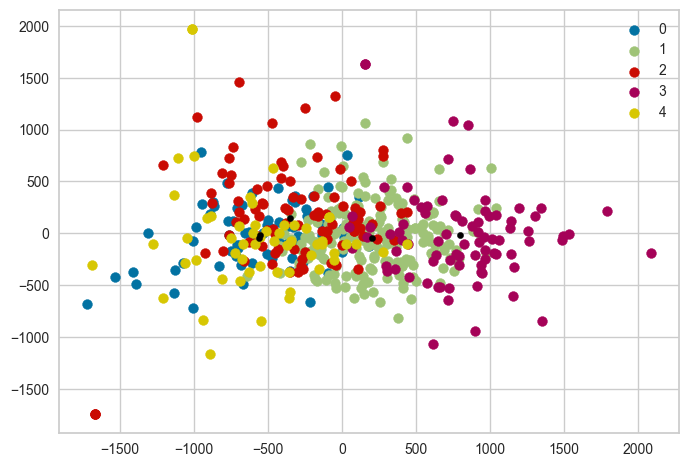

In [ ]:
#Getting the Centroids

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(feat_pca[label == i , 0] , feat_pca[label == i , 1] , s=50, label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'black')
plt.legend()
plt.show()

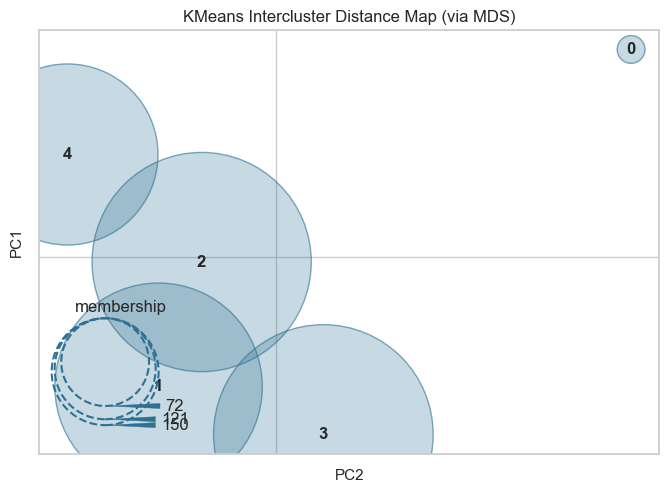

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
visualizer = InterclusterDistance(KMeans(5))
visualizer.fit(desc)
visualizer.show()

In [ ]:
silhouette_score(desc, label)

0.0008553979325151573

In [ ]:
sample_df.kmeans_label.value_counts()

1    194
2     93
3     83
0     73
4     57
Name: kmeans_label, dtype: int64

In [ ]:
sample_df.groupby(by=sample_df.label).kmeans_label.value_counts()

label    kmeans_label
drink    1               34
         2               21
         3               21
         4               14
         0               10
food     1               41
         0               20
         3               16
         2               12
         4               11
inside   1               50
         2               22
         0               13
         3               10
         4                5
menu     3               25
         4               20
         0               19
         1               19
         2               17
outside  1               50
         2               21
         0               11
         3               11
         4                7
Name: kmeans_label, dtype: int64

## TSNE

In [ ]:
pca = PCA(n_components=5, random_state=42)
feat_pca = pca.fit_transform(desc)
print("Dimension after PCA reduction : ", feat_pca.shape)

Dimension after PCA reduction :  (500, 5)


In [ ]:
tsne = TSNE(n_components=2, n_iter=500, perplexity=100)

tsne_results = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
df_tsne['class'] = sample_df["label"]

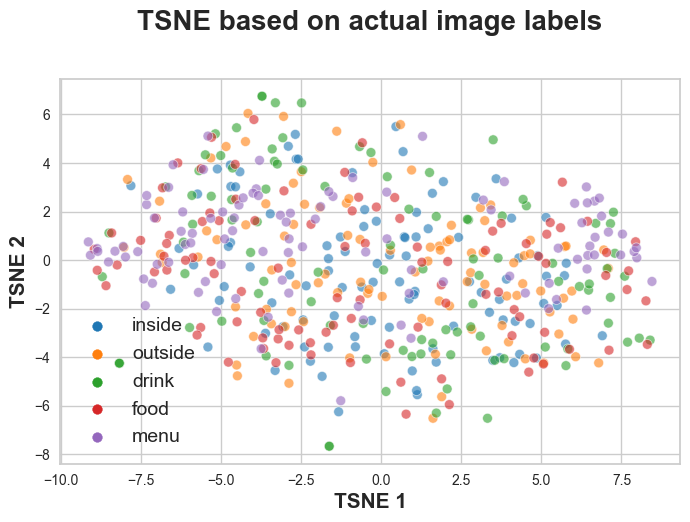

In [ ]:
df_tsne['tsne-2d-one'] = tsne_results[:,0]
df_tsne['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=5),
    data=df_tsne,
    legend="full",
    s=50,
    alpha=0.6
)

plt.title('TSNE based on actual image labels', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('TSNE 1', fontsize = 15, fontweight = 'bold')
plt.ylabel('TSNE 2', fontsize = 15, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [ ]:
cls = cluster.KMeans(n_clusters=5, random_state=42)
cls.fit(tsne_results)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(500, 6)


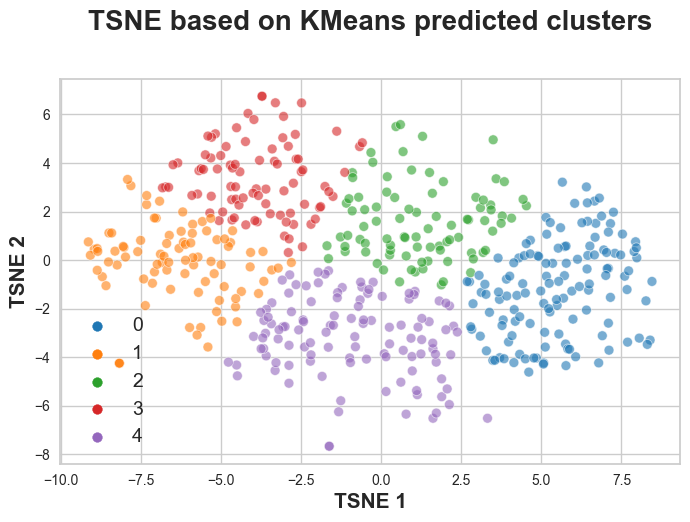

In [35]:
df_tsne['tsne-2d-one'] = tsne_results[:,0]
df_tsne['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=5),
    data=df_tsne,
    legend="full",
    s=50,
    alpha=0.6
)

plt.title('TSNE based on KMeans predicted clusters', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('TSNE 1', fontsize = 15, fontweight = 'bold')
plt.ylabel('TSNE 2', fontsize = 15, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [36]:
print("ARI : ", adjusted_rand_score(df_tsne['class'], df_tsne['cluster']))

ARI :  0.013344078080715341


## Transfer learning with VGG16

In [148]:
vgg16 = keras.applications.vgg16
image_size = [224, 224]
vgg = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=image_size+[3]) #, classes=5

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

# flatten our last layer of the vgg model
x = Flatten()(vgg.output)

# Add fully connected layer for classification with 5 classes
# predictions = Dense(5, activation="softmax")(x)

# view model structure
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Example of feature extraction via VGG16

In [149]:
img_path = str(directory + "\\photos\\" + sample_df.photo_id.iloc[300] + ".jpg")

In [150]:
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))

img_as_array = tf.keras.utils.img_to_array(img)
img_as_array = img_as_array.reshape((1, img_as_array.shape[0], img_as_array.shape[1], img_as_array.shape[2]))
# img_as_array = np.expand_dims(img_as_array, axis=0)

print(np.min(img_as_array), np.max(img_as_array))
print(img_as_array.shape)

0.0 255.0
(1, 224, 224, 3)


In [151]:
img_preprocessed = vgg16.preprocess_input(img_as_array)
features = vgg.predict(img_preprocessed)
print(features.shape)

1/1 [==============================] - 4s 4s/step
(1, 7, 7, 512)


### Feature extraction on 500 photos with VGG16

In [152]:
def get_vgg16_features():

    vgg16_feats = []

    for i in range (0,sample_df.shape[0]):
        img_path = str(directory + "\\photos\\" + sample_df.photo_id.iloc[i] + ".jpg")
        img = tf.keras.utils.load_img(img_path, target_size=(224, 224, 3))

        x = tf.keras.utils.img_to_array(img)
        xs = np.expand_dims(x, axis=0)
        xs = vgg16.preprocess_input(xs)
        features = vgg.predict(xs)

        vgg16_feats.append(features.flatten())

    return vgg16_feats

In [153]:
vgg16_features = get_vgg16_features()

1/1 [==============================] - 3s 3s/step


In [162]:
vgg16_features_np = np.array(vgg16_features)

pca_vgg = PCA(n_components=0.80, random_state=42)
feat_pca_vgg = pca_vgg.fit_transform(vgg16_features_np)
print("Dimensions after PCA reduction: ", feat_pca_vgg.shape)

Dimensions after PCA reduction:  (1000, 492)


In [163]:
tsne = TSNE(n_components=2, n_iter=500, perplexity=30, random_state=42)

tsne_results = tsne.fit_transform(feat_pca_vgg)

df_tsne = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
df_tsne['class'] = sample_df["label"]

In [164]:
df_tsne

tsne1      tsne2   class
0   -18.686279 -15.502479  inside
1    -6.720417   3.032229  inside
2    -1.700766  -1.321002  inside
3   -15.270324   1.449727  inside
4   -22.577610  11.876221  inside
..         ...        ...     ...
995   5.403537 -11.259866    menu
996  16.610062 -23.325148    menu
997  12.080471 -23.088366    menu
998  14.400951 -17.259928    menu
999   7.404815 -10.981453    menu

[1000 rows x 3 columns]

In [165]:
tsne_res = np.array(df_tsne[["tsne1", "tsne2"]])

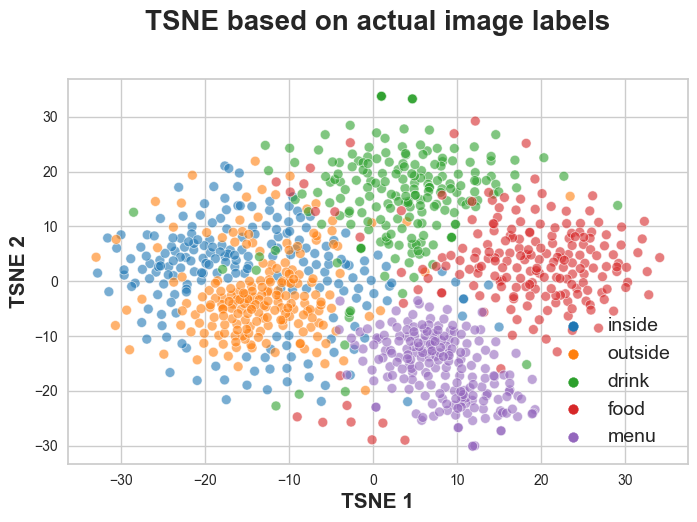

In [167]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=5),
    data=df_tsne,
    legend="full",
    s=50,
    alpha=0.6
)

plt.title('TSNE based on actual image labels', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('TSNE 1', fontsize = 15, fontweight = 'bold')
plt.ylabel('TSNE 2', fontsize = 15, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [168]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(tsne_res)
df_tsne["cluster"] = kmeans.labels_
print(df_tsne.shape)

(1000, 4)


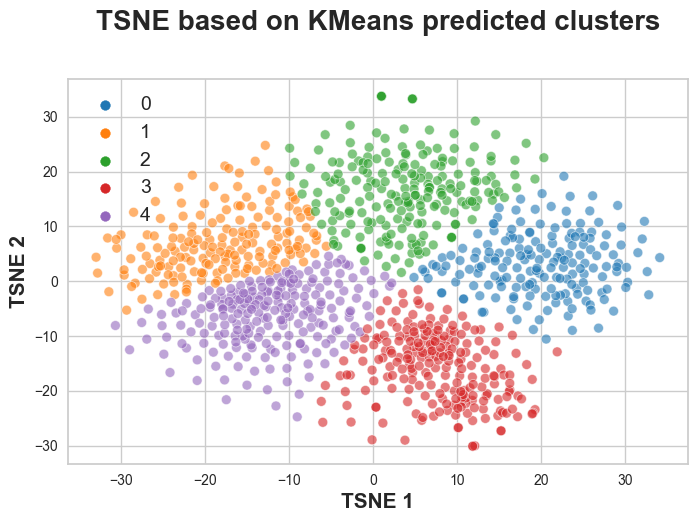

In [169]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=5),
    data=df_tsne,
    legend="full",
    s=50,
    alpha=0.6
)

plt.title('TSNE based on KMeans predicted clusters', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('TSNE 1', fontsize = 15, fontweight = 'bold')
plt.ylabel('TSNE 2', fontsize = 15, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [170]:
print("ARI : ", adjusted_rand_score(df_tsne['class'], df_tsne['cluster']))

ARI :  0.6132179715521914


In [171]:
class_dictionary = {
    0:"food",
    1:"inside",
    2:"drink",
    3:"menu",
    4:"outside"
}

In [172]:
df_tsne["predicted_class"] = df_tsne["cluster"].map(class_dictionary)

In [173]:
df_tsne

tsne1      tsne2   class  cluster predicted_class
0   -18.686279 -15.502479  inside        4         outside
1    -6.720417   3.032229  inside        4         outside
2    -1.700766  -1.321002  inside        4         outside
3   -15.270324   1.449727  inside        1          inside
4   -22.577610  11.876221  inside        1          inside
..         ...        ...     ...      ...             ...
995   5.403537 -11.259866    menu        3            menu
996  16.610062 -23.325148    menu        3            menu
997  12.080471 -23.088366    menu        3            menu
998  14.400951 -17.259928    menu        3            menu
999   7.404815 -10.981453    menu        3            menu

[1000 rows x 5 columns]

In [174]:
print(classification_report(df_tsne["class"], df_tsne["predicted_class"]))

              precision    recall  f1-score   support

       drink       0.85      0.88      0.86       200
        food       0.93      0.83      0.88       200
      inside       0.70      0.61      0.65       200
        menu       0.88      0.97      0.92       200
     outside       0.67      0.73      0.70       200

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.80      1000
weighted avg       0.81      0.81      0.80      1000



In [175]:
cm = confusion_matrix(df_tsne["class"], df_tsne["predicted_class"])
pd.DataFrame(cm, columns=labels, index=labels)

inside  outside  drink  food  menu
inside      176        4      9     3     8
outside      18      167      2    12     1
drink         5        5    122     9    59
food          0        1      0   195     4
menu          8        2     41     3   146

* The class labeled with the lowest precision is "outside", while the most precisely labeled class was "food".
* Inside and outside are often mistaken
* Menu and drink are often mistaken

In [139]:
## VIZ with TSNE visualizer with photos in it

In [176]:
df_tsne['photo_id'] = sample_df['photo_id']

In [177]:
df_tsne

tsne1      tsne2   class  cluster predicted_class  \
0   -18.686279 -15.502479  inside        4         outside   
1    -6.720417   3.032229  inside        4         outside   
2    -1.700766  -1.321002  inside        4         outside   
3   -15.270324   1.449727  inside        1          inside   
4   -22.577610  11.876221  inside        1          inside   
..         ...        ...     ...      ...             ...   
995   5.403537 -11.259866    menu        3            menu   
996  16.610062 -23.325148    menu        3            menu   
997  12.080471 -23.088366    menu        3            menu   
998  14.400951 -17.259928    menu        3            menu   
999   7.404815 -10.981453    menu        3            menu   

                   photo_id  
0    cO58-hmFkBxDUQ4B0p40AA  
1    7_hiXIbS5Ub0_eiRxr5COg  
2    XseBUNM81RxxtfDgyjxXiA  
3    _IRUZoGYSr9bICvBJrPnhw  
4    x8xVVzTI3yW5xZraRZNxfQ  
..                      ...  
995  FYcHZXujQX0GGs1oevYfdQ  
996  PP2dCAxKLHMzqNAQfoeerw  
997  WiRnjbxlRNGBrCzYDhybWA  
998  Wc-r1NIkj8VvpajjOFa1YA  
999  M0qxoYvHWadKR04Bq8BOGQ  

[1000 rows x 6 columns]

In [178]:
def display_mislabeled_pics(true_class):
    images = []
    titles = []
    for i in range(0,4):
        p_id = df_tsne[(df_tsne["class"]==true_class)&(df_tsne["predicted_class"]!=true_class)].iloc[i]["photo_id"]
        img = Image.open(directory + "\\photos\\" + p_id + ".jpg")
        predicted_class = df_tsne[(df_tsne["class"]==true_class)&(df_tsne["predicted_class"]!=true_class)].iloc[i]["predicted_class"]
        title = str("True class: " + true_class + ", Predicted class: " + predicted_class)
        titles.append(title)
        images.append(img)

    # plot images

    for i in range(len(images)):
        plt.subplot(2,2,i+1),plt.imshow(images[i])
        plt.title(titles[i])
    plt.show()

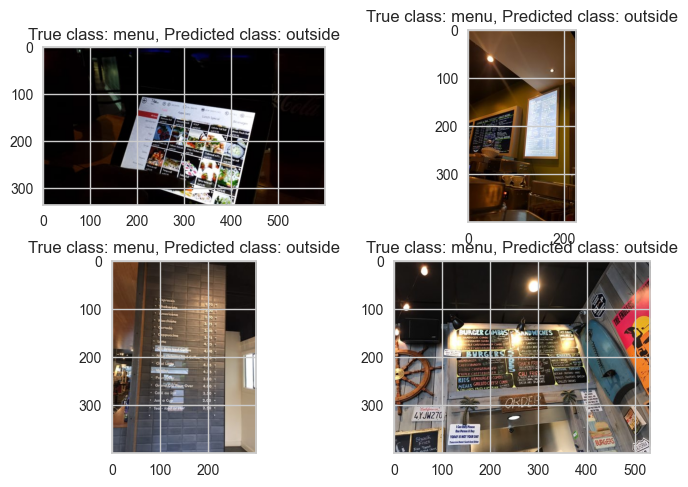

In [179]:
display_mislabeled_pics("menu")

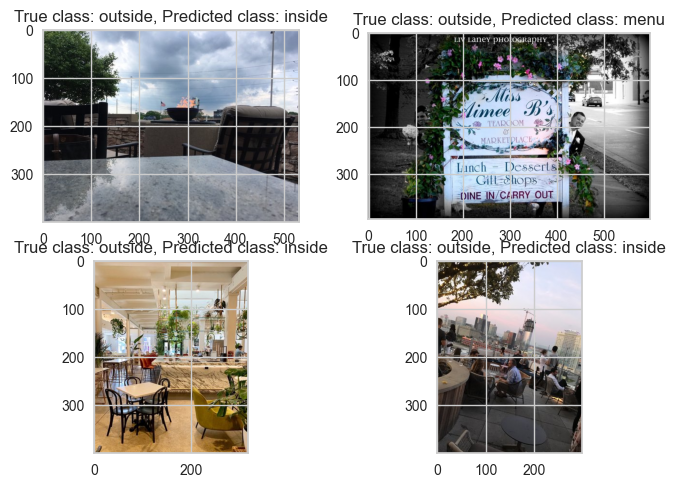

In [180]:
display_mislabeled_pics("outside")

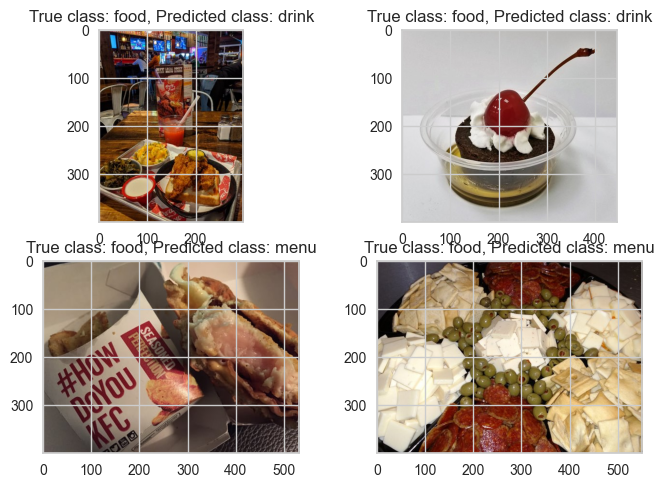

In [181]:
display_mislabeled_pics("food")

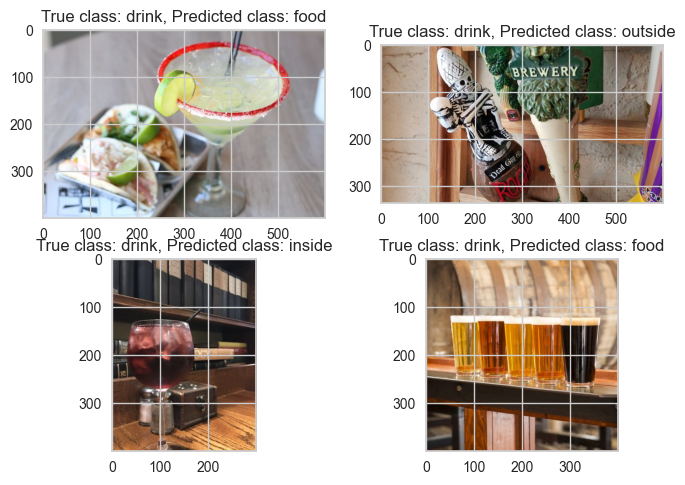

In [182]:
display_mislabeled_pics("drink")

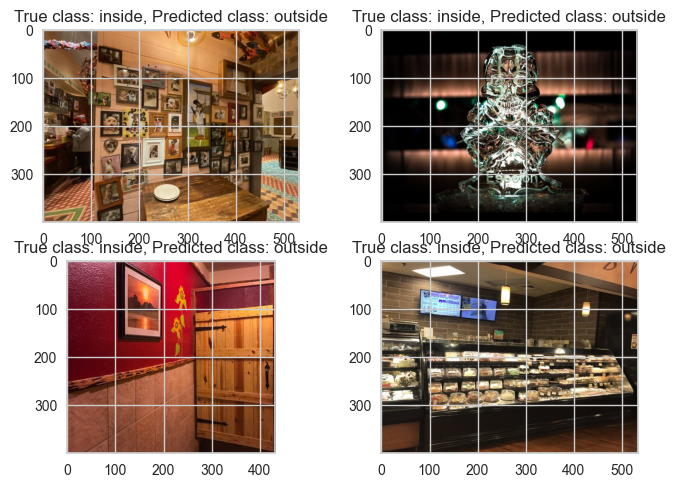

In [183]:
display_mislabeled_pics("inside")